In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from helper import (plot_hexbin_accumulated, average_cell_type_correlations, calculate_cell_type_differences_and_correlations)

In [2]:
# loading Akita predictions for model 0 test set
preds = np.load("/project/fudenber_735/akitaX1_analyses_data/cell_type_specificity/test_human_fold0_AkitaV2/combined_pred_matrices.npy", allow_pickle=True)

In [3]:
# loading target maps for model 0 test set
targets = np.load("/project/fudenber_735/akitaX1_analyses_data/cell_type_specificity/test_human_fold0_AkitaV2/combined_target_matrices.npy", allow_pickle=True)

In [4]:
cell_types = ["HFF", "H1hESC", "GM12878", "IMR90", "HCT116"]

## Pixel-wise correlations

Plotting for HFF...


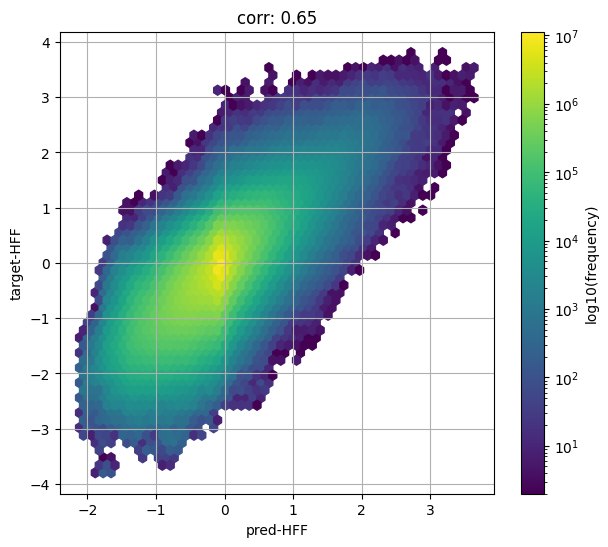

Plotting for H1hESC...


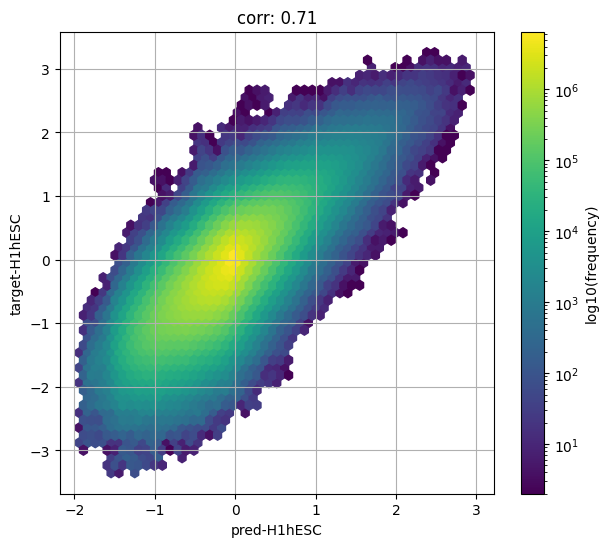

Plotting for GM12878...


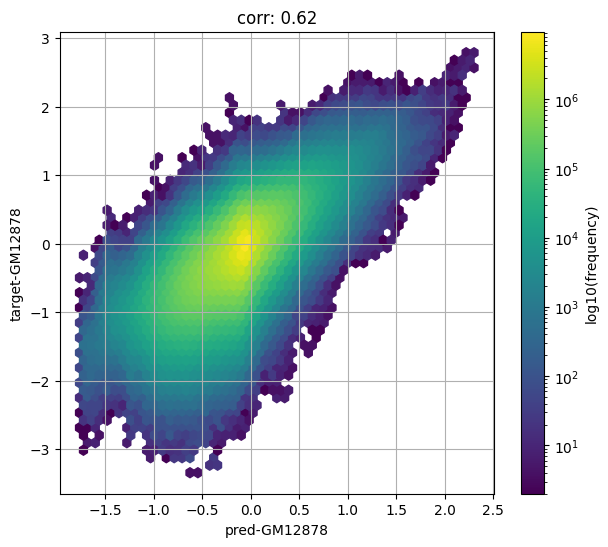

Plotting for IMR90...


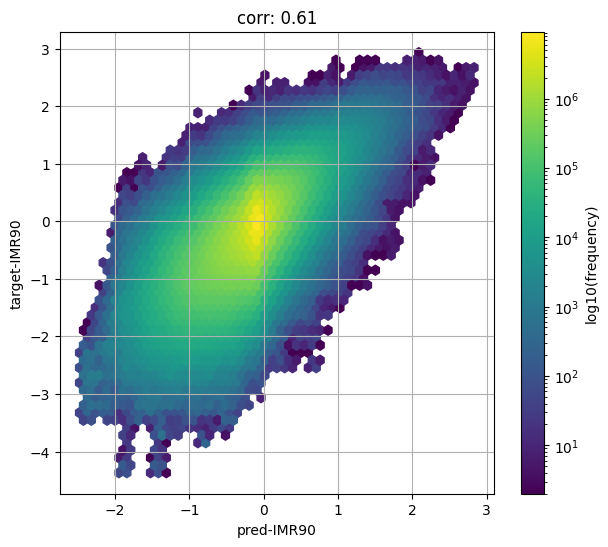

Plotting for HCT116...


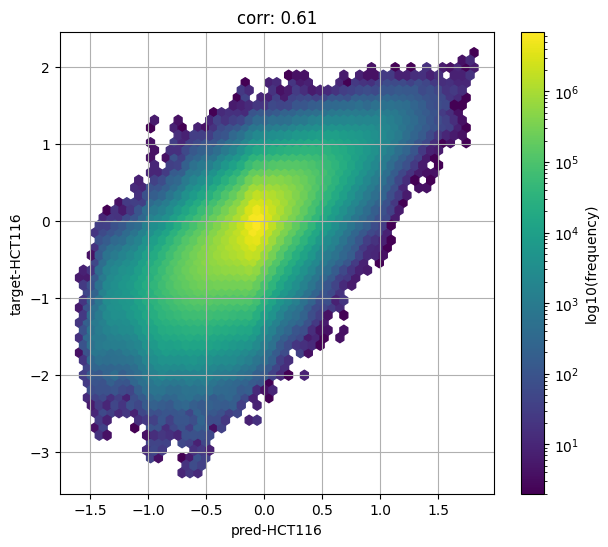

In [5]:
for idx, cell_type in enumerate(cell_types):
    print(f"Plotting for {cell_type}...")
    plot_hexbin_accumulated(preds, targets, cell_type_idx=idx, cell_type_name=cell_type, save_path=f"./plots_human/{cell_type}_corr.pdf")

## Correlations between predictions

In [6]:
# Calculate the average correlations for preds
pred_corr_avg = average_cell_type_correlations(preds)

In [15]:
# Function to plot heatmap of correlations
def plot_heatmap(corr_matrix, title, cell_type_names, save_path=None):
    plt.figure(figsize=(8, 6))
    
    mask = np.tril(np.ones_like(corr_matrix, dtype=bool))
    
    vmin = np.min(corr_matrix)
    vmax = np.max(corr_matrix)
    
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis', 
                vmin=vmin, vmax=vmax, mask=mask, cbar_kws={"shrink": .8},
                xticklabels=cell_type_names, yticklabels=cell_type_names)
    
    plt.title(title)
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', format="pdf")
    
    plt.show()

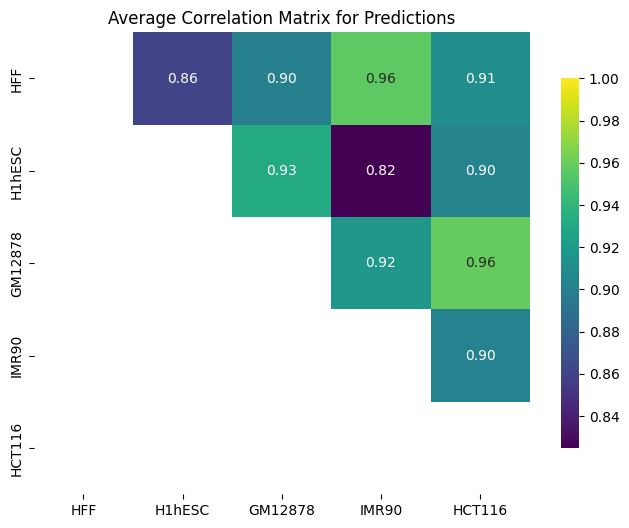

In [8]:
plot_heatmap(pred_corr_avg, "Average Correlation Matrix for Predictions", cell_type_names=cell_types, save_path="./plots_human/predictions_cell_type_corr.pdf")

## Correlations between targets

In [9]:
# Calculate the average correlations for targets
targ_corr_avg = average_cell_type_correlations(targets)

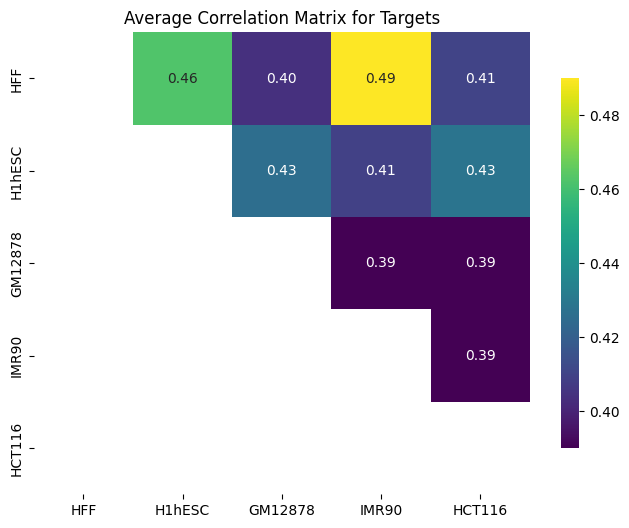

In [11]:
plot_heatmap(targ_corr_avg, "Average Correlation Matrix for Targets", cell_type_names=cell_types, save_path="./plots_human/targets_cell_type_corr.pdf")

## Correlations between cell-type differences

In [12]:
diff_corr = calculate_cell_type_differences_and_correlations(preds, targets)

/home1/smaruj/miniconda3/envs/basenji_py3.9_tf2.15/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


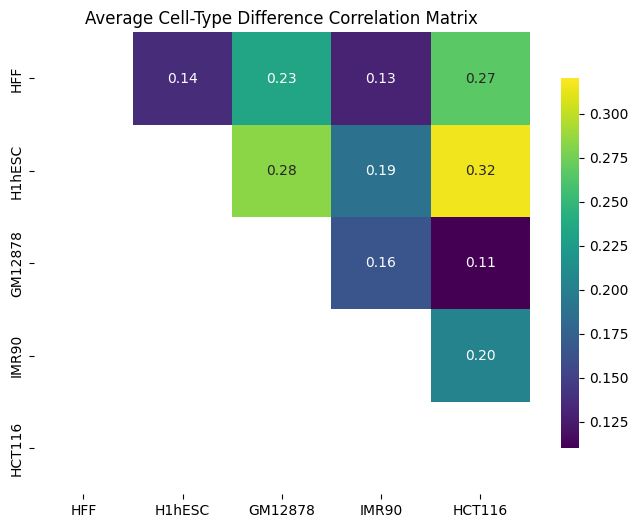

In [14]:
plot_heatmap(diff_corr, "Average Cell-Type Difference Correlation Matrix", cell_type_names=cell_types, save_path="./plots_human/cell_type_differences_corr.pdf")